# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [120]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px

In [121]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [122]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()

In [123]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [124]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [125]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

newStateData = pd.DataFrame()

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [126]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

newStateData = pd.DataFrame()

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [130]:
stateData = stateData.fillna(0)
stateData

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,...,03-28-2020,03-29-2020,03-30-2020,03-31-2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020
Washington,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4030,4465,4923,5432,5608,6389,6846,7247,7825,8311
Illinois,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,3491,4596,5056,5994,6980,7695,8904,10357,11259,12262
Arizona,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,773,919,1157,1289,1530,1715,1937,2187,2486,2732
California,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5095,5852,7138,8210,9399,10773,12004,12837,15034,16019
Massachusetts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4257,4955,5752,6620,7738,8966,10402,11736,12500,13837
Wisconsin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1055,1164,1230,1412,1556,1748,2012,2030,2320,2449
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2455,2792,3147,3809,4355,5069,5734,6556,7209,8043
Nebraska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96,108,145,172,210,246,279,321,364,417
Oregon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,479,548,606,690,736,826,899,899,1068,1068
Rhode Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239,294,408,488,566,657,711,806,922,1082


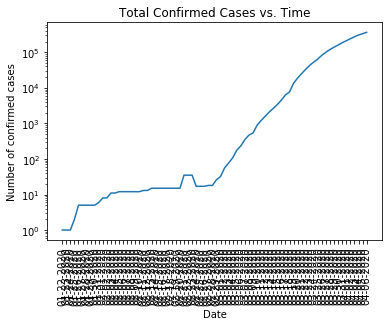

In [131]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

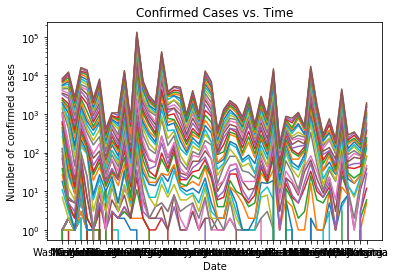

In [132]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':])

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

Subtract mean from time series and set variance to one.

In [326]:
idx = pd.IndexSlice

# confirmed cases normalized
data = stateData.loc[:,'01-22-2020':] # select all date ranges
scaledDataTime = preprocessing.scale(data) # Scaled data has zero mean and unit variance across time
scaledDataLoc = preprocessing.scale(np.transpose(data)) # Scaled data has zero mean and unit variance across location


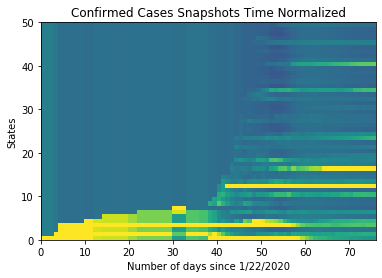

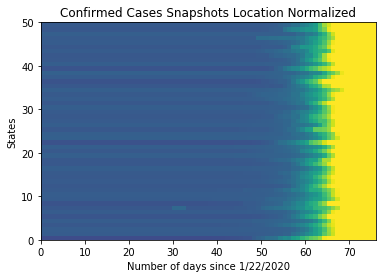

In [328]:
# plot normalized data snapshots
plt.title('Confirmed Cases Snapshots Time Normalized')
plt.pcolor(scaledDataTime, vmin=-1, vmax=1)
plt.ylabel('States')
plt.xlabel('Number of days since 1/22/2020')
plt.show()

plt.title('Confirmed Cases Snapshots Location Normalized')
plt.pcolor(np.transpose(scaledDataLoc), vmin=-1, vmax=1)
plt.ylabel('States')
plt.xlabel('Number of days since 1/22/2020')
plt.show()

## Take DMD

**Modes**: Columns are the low-rank structures individuated


**Dynamics**: Rows refer to the time evolution of each mode


**Eigs**: eigenvalues of the low dimensional operator


**Reconstructed_data**: the approximated system evolution

### DMD with States as Snapshots

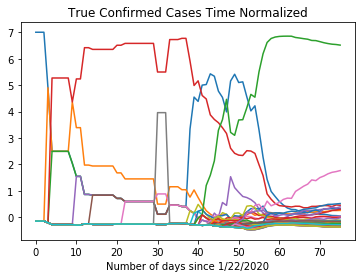

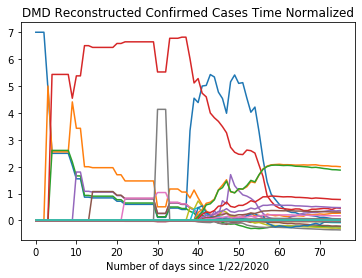

In [340]:
dmd = DMD()
dmd.fit(scaledDataTime.T) # transpose so snapshots (state data) are arranged by column

# plot true data
plt.title('True Confirmed Cases Time Normalized')
plt.plot(scaledDataTime.T)
plt.xlabel('Number of days since 1/22/2020')
plt.show()

# plot dmd reconstructed data
plt.title('DMD Reconstructed Confirmed Cases Time Normalized')
plt.plot(dmd.reconstructed_data.real)
plt.xlabel('Number of days since 1/22/2020')
plt.show()

Eigenvalue (0.7011690712591766+0.20003840536605486j): distance from unit circle 0.4683465698881496
Eigenvalue (0.7011690712591766-0.20003840536605486j): distance from unit circle 0.4683465698881496
Eigenvalue (0.44749414658962217+0.41699083229538847j): distance from unit circle 0.625867634549625
Eigenvalue (0.44749414658962217-0.41699083229538847j): distance from unit circle 0.625867634549625
Eigenvalue (0.4872563288645238+0j): distance from unit circle 0.762581269981467
Eigenvalue (0.14268329699359894+0.5548590153976726j): distance from unit circle 0.6717729497909618
Eigenvalue (0.14268329699359894-0.5548590153976726j): distance from unit circle 0.6717729497909618
Eigenvalue (-0.13412182712836213+0.585542121221948j): distance from unit circle 0.6391517597626513
Eigenvalue (-0.13412182712836213-0.585542121221948j): distance from unit circle 0.6391517597626513
Eigenvalue (0.1867025079239757+0.35841921172382324j): distance from unit circle 0.836677842202171
Eigenvalue (0.1867025079239757

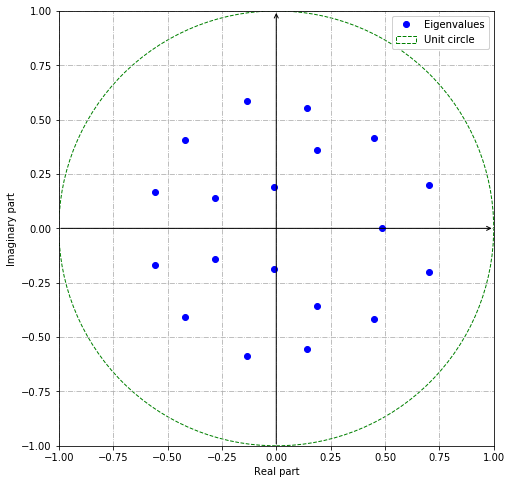

In [341]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

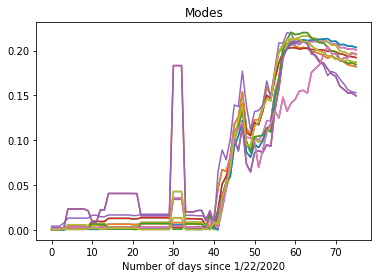

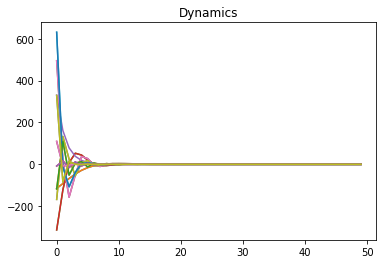

In [342]:
# dynamic modes
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
    plt.xlabel('Number of days since 1/22/2020')
plt.show()

# dynamic modes
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()

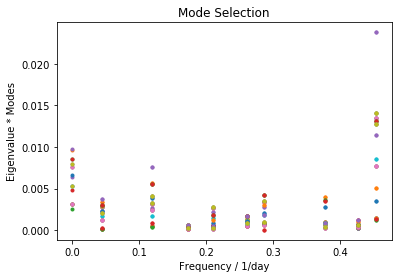

In [343]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


### DMD with Time as Snapshots

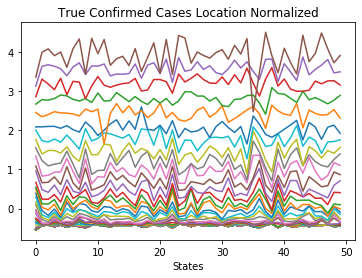

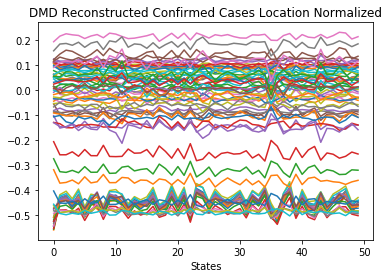

In [344]:
dmd = DMD()
dmd.fit(scaledDataLoc.T) # transpose so snapshots (time data) are arranged by column

# plot true data
plt.title('True Confirmed Cases Location Normalized')
plt.plot(np.transpose(scaledDataConfirmed))
plt.xlabel('States')
plt.show()

# plot dmd reconstructed data
plt.title('DMD Reconstructed Confirmed Cases Location Normalized')
plt.plot(dmd.reconstructed_data.real)
plt.xlabel('States')
plt.show()

Eigenvalue (-0.7948257668980325+0.6023139605527696j): distance from unit circle 0.005469893198191134
Eigenvalue (-0.7948257668980325-0.6023139605527696j): distance from unit circle 0.005469893198191134
Eigenvalue (-0.40510370220789116+0.9489113925681865j): distance from unit circle 0.06454184048823475
Eigenvalue (-0.40510370220789116-0.9489113925681865j): distance from unit circle 0.06454184048823475
Eigenvalue (-0.8782563073004483+0.1992214025702873j): distance from unit circle 0.18897669144490792
Eigenvalue (-0.8782563073004483-0.1992214025702873j): distance from unit circle 0.18897669144490792
Eigenvalue (-0.8252128227431983+0j): distance from unit circle 0.3190237971802028
Eigenvalue (0.13588644111116152+0.9588965403448128j): distance from unit circle 0.06205230003689177
Eigenvalue (0.13588644111116152-0.9588965403448128j): distance from unit circle 0.06205230003689177
Eigenvalue (-0.0617746391686462+0.7091821305204861j): distance from unit circle 0.49324459970600787
Eigenvalue (-0

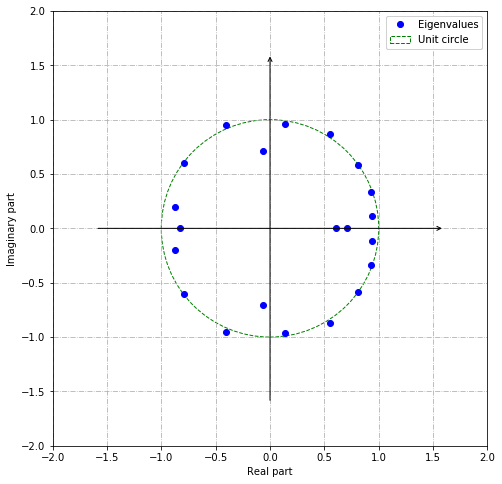

In [345]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

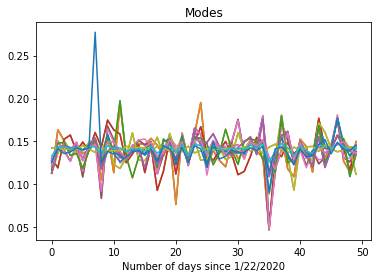

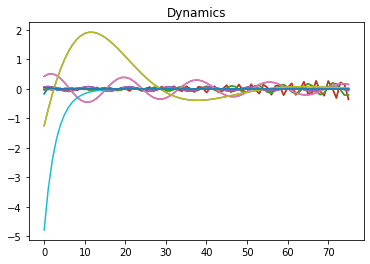

In [346]:
# dynamic modes
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
    plt.xlabel('Number of days since 1/22/2020')
plt.show()

# dynamic modes
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
plt.show()

In [347]:
# Modes map

dmd = DMD(svd_rank=1)
dmd.fit(scaledDataConfirmed.T) # transpose so snapshots (state data) are arranged by column


with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=abs(dmd.modes.real)*10-1.3,
                           range_color=(0, 0.2),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()